In [1]:
import numpy as np
import pyflux as pf

In [2]:
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

returns

ModuleNotFoundError: No module named 'pandas'

In [3]:
jpm = DataReader('JPM',  'yahoo', datetime(2006,1,1), datetime(2016,3,10))
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r');
plt.ylabel('Returns');
plt.title('JPM Returns');

NameError: name 'DataReader' is not defined

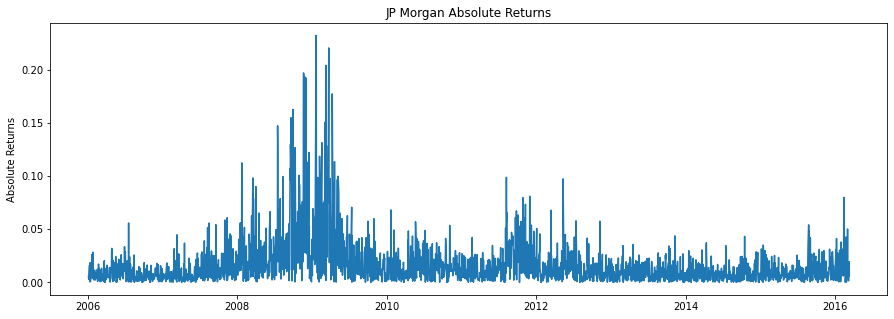

In [5]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

In [7]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: JPM Returns                         Method: MLE                                       
Start Date: 2006-01-05 00:00:00                         Log Likelihood: 6594.7925                         
End Date: 2016-03-10 00:00:00                           AIC: -13181.585                                   
Number of observations: 2562                            BIC: -13158.1908                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 